In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
for dirpath,dirnames,filenames in os.walk(r"C:\Users\sham\Downloads\New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in 'C:\Users\omark\Downloads\New Masks Dataset'.
there are 2 directories and 0 images in 'C:\Users\omark\Downloads\New Masks Dataset\Test'.
there are 0 directories and 50 images in 'C:\Users\omark\Downloads\New Masks Dataset\Test\Mask'.
there are 0 directories and 50 images in 'C:\Users\omark\Downloads\New Masks Dataset\Test\Non Mask'.
there are 2 directories and 0 images in 'C:\Users\omark\Downloads\New Masks Dataset\Train'.
there are 0 directories and 300 images in 'C:\Users\omark\Downloads\New Masks Dataset\Train\Mask'.
there are 0 directories and 300 images in 'C:\Users\omark\Downloads\New Masks Dataset\Train\Non Mask'.
there are 2 directories and 0 images in 'C:\Users\omark\Downloads\New Masks Dataset\Validation'.
there are 0 directories and 153 images in 'C:\Users\omark\Downloads\New Masks Dataset\Validation\Mask'.
there are 0 directories and 153 images in 'C:\Users\omark\Downloads\New Masks Dataset\Validation\Non Mask'.


**for checking that dataset is loaded corectly  in  colab as it is in the orginal dataset and test that by graping some images from loaded** 

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['146.jpg']
image shape (434, 321, 3)


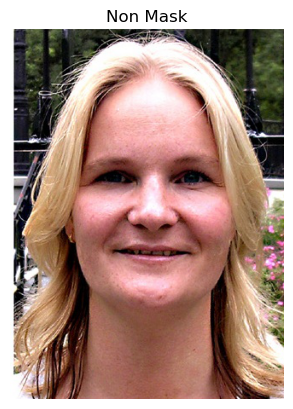

In [ ]:
img = view_image(r"C:/Users/sham/Downloads/New Masks Dataset/Train/","Non Mask")

['1514.jpg']
image shape (720, 1080, 3)


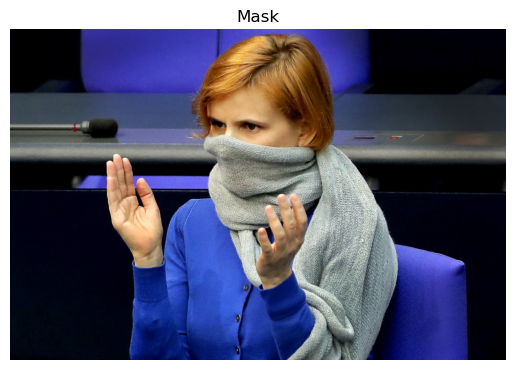

In [ ]:
img = view_image(r"C:/Users/sham/Downloads/New Masks Dataset/Train/","Mask")

In [ ]:
data=[]
labels=[]
no_mask=os.listdir(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
mask=os.listdir(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread(r"C:/Users/sham/Downloads/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(1200, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 3s 0us/step


In [ ]:
model.fit(X_train, y_train, epochs=7,validation_split= 0.1, batch_size=32)

Epoch 1/15
31/31 [==============================] - 15s 443ms/step - loss: 0.3722 - accuracy: 0.9002 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 2/15
31/31 [==============================] - 12s 400ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/15
31/31 [==============================] - 12s 391ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/15
31/31 [==============================] - 12s 390ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/15
31/31 [==============================] - 12s 388ms/step - loss: 9.7792e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/15
31/31 [==============================] - 12s 388ms/step - loss: 7.7542e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/15
31/31 [==============================] - 12s 390ms/step - loss: 6.4561e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accu

In [ ]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

4/4 [==============================] - 2s 297ms/step


In [ ]:
confusion_matrix(y_test, predict)

array([[60,  0],
       [ 0, 60]], dtype=int64)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,60,0
Mask,0,60


In [ ]:
model_name = r"C:/Users/sham/Downloads/New Masks Dataset/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)

**real time detection**

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

%config Completer.use_jedi = False

In [ ]:
face_classifier = cv2.CascadeClassifier(r"C:/Users/sham/Downloads/opencv-master/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml")
mask_detection = tf.keras.models.load_model(r"C:/Users/sham/Downloads/New Masks Dataset/mask_detection_best.h5")

In [ ]:
text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [ ]:
def predict(image):
    
    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)
    
    return prediction[0][0]

In [ ]:
def detector(gray_image, frame):
    
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)
    
    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)

        
        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)
        
        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)
            
    return frame

In [ ]:
video_cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = video_cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detect = detector(gray_frame, frame)
    
    cv2.imshow("Video", detect)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
video_cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step
